# Brute force bifurcation analysis

I couldn't figure out how to use PyDSTool for more formal continuation/numerical bifuration analysis, so what I'll do here (using a 2D system) is, for each ($\gamma$, $h1$) pair in (0, 1) for both, I'll use SymPy's numerical solvers to find the all three possible zeros of the system

In [31]:
# Setting up things in SymPy
from sympy import *
from IPython.display import display

# Declaring scalars
# x0, x1 are the dimensions
x0, x1, h0, h1, gamma = symbols('x0 x1 h0 h1 gamma')  # make these formal symbols for SymPy to manipulate
h0 = 1.0
#h1 = 1.0
#gamma = 0.25

# Declaring vectors
x = Matrix([x0, x1])  # state vector
cg = Matrix([1, 0])  # centers of the RBFs
cu = Matrix([0, 1])

H = h0*exp(-(x-cg).dot(x-cg) / gamma) + h1*exp(-(x-cu).dot(x-cu) / gamma)  # defining the harmony function
dxdt = Matrix([diff(H, i) for i in x])

In [71]:
# Running the simulations
import numpy as np
import pandas as pd
from itertools import product
gvec = np.arange(0.1, 0.5, 0.1)
hvec =  np.arange(0.05, 1.0, 0.15)

data = []
for g, h in product(gvec, hvec):
    #if g == gvec[0] and h == hvec[0]:
    xg0 = (1, 0)
    xu0 = (0, 1)
    xmid0 = (0.5, 0.5)
    #else:
        #xg0 = (data[-1][2], data[-1][3])
        #xmid0 = (data[-1][4], data[-1][5])
        #xu0 = (data[-1][6], data[-1][7])
    xg = list(nsolve(dxdt.subs([(h1, h), (gamma, g)]), x, xg0, verify=False))
    xu = list(nsolve(dxdt.subs([(h1, h), (gamma, g)]), x, xu0, verify=False))
    xmid = list(nsolve(dxdt.subs([(h1, h), (gamma, g)]), x, xmid0, verify=False))
    data.append([g, h, xg[0], xg[1], xmid[0], xmid[1], xu[0], xu[1]])

In [72]:
df = pd.concat([pd.DataFrame([i], 
                             columns=['gamma', 'h1', 'gx0', 'gx1', 'sx0', 'sx1', 'ux0', 'ux1']) for i in data])
df.head()


,gamma,h1,gx0,gx1,sx0,sx1,ux0,ux1
0,0.1,0.05,0.999999999896942,1.03057681536142e-10,0.416698122687120,0.583301877312880,4.12231387232041e-8,0.999999958776861
0,0.1,0.20,0.999999999587769,4.12230731115144e-10,0.455280077866603,0.544719922133397,1.03057722543399e-8,0.999999989694228
0,0.1,0.35,0.999999999278596,7.21403788150008e-10,0.470834591433433,0.529165408566567,5.88901170236203e-9,0.999999994110988
0,0.1,0.50,0.999999998969423,1.03057685264073e-9,0.480744853071753,0.519255146928247,4.12230790762049e-9,0.999999995877692
0,0.1,0.65,0.999999998660250,1.33974992458732e-9,0.488033553940495,0.511966446059505,3.17100596513822e-9,0.999999996828994


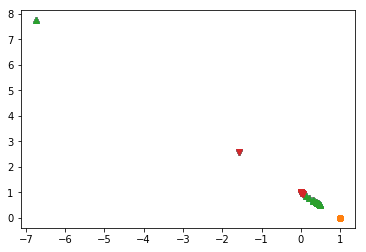

In [76]:
import matplotlib.pyplot as plt

# A first glimpse
plt.figure()
for g, h in product(gvec, hvec):
    plt.plot(df.loc[('gamma' == g) and ('h1' == h),:].gx0, df.loc[('gamma' == g) and ('h1' == h),:].gx1, 'o')
    plt.plot(df.loc[('gamma' == g) and ('h1' == h),:].sx0, df.loc[('gamma' == g) and ('h1' == h),:].sx1, '^')
    plt.plot(df.loc[('gamma' == g) and ('h1' == h),:].ux0, df.loc[('gamma' == g) and ('h1' == h),:].ux1, 'v')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.show()